In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# One way: NICU Costs

In [3]:
nicu_costs = pd.read_csv("Data_SA/nicu_costs.csv")

In [4]:
costs = nicu_costs['cLevel2Room']
cra_nicu = nicu_costs['CRA']
nsc_nicu = nicu_costs['NSC']
eco_nicu = nicu_costs['ECO']

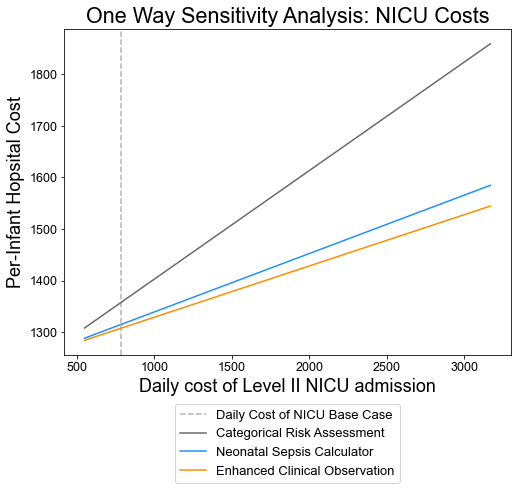

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axvline(782.15, alpha=0.5, color='dimgrey', linestyle='dashed', label='Daily Cost of NICU Base Case')
plt.plot(costs, cra_nicu, color = 'dimgrey', label='Categorical Risk Assessment')
plt.plot(costs, nsc_nicu, color = 'dodgerblue', label='Neonatal Sepsis Calculator')
plt.plot(costs, eco_nicu, color = 'darkorange', label='Enhanced Clinical Observation')

plt.xlabel('Daily cost of Level II NICU admission')
plt.ylabel('Per-Infant Hopsital Cost')
plt.title('One Way Sensitivity Analysis: NICU Costs')
plt.legend(fontsize='13', loc='center', bbox_to_anchor=(0.5, -0.27))

plt.show()

# Probabilistic

In [6]:
psa = pd.read_csv("Data_SA/10000_psa_results_11-19.csv")

In [7]:
cra_distribution = psa['CRA.4']
nsc_distribution = psa['NSC.4']
eco_distribution = psa['ECO.4']

In [8]:
psa.head()

,Iteration,Parameters,pChorio,pConcernNoChorio,pYellow,pRed,pConcernGreen,pConcernYellow,pConcernECO,pEOSNoChorio,...,NSC.3,ECO.3,Received ABX,CRA.4,NSC.4,ECO.4,ICER ($/QALY),CRA.5,NSC.5,ECO.5
0,1,NaN,0.036902,0.037928,0.026680,0.015795,0.018952,0.108514,0.045636,0.013545,...,0.078680,0.096277,NaN,0.073462,0.036869,0.045667,NaN,Strongly Dominated (Baseline),Cost Saving,Strongly Dominated
1,2,NaN,0.018553,0.037954,0.029198,0.013357,0.017531,0.109039,0.030943,0.010756,...,0.071166,0.066401,NaN,0.055820,0.033344,0.030961,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
2,3,NaN,0.022701,0.037989,0.027916,0.016408,0.020085,0.114438,0.033837,0.012392,...,0.082316,0.072394,NaN,0.059849,0.038819,0.033859,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
3,4,NaN,0.036673,0.038747,0.027748,0.018225,0.019781,0.104026,0.021575,0.009554,...,0.084929,0.048112,NaN,0.074045,0.040031,0.021623,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
4,5,NaN,0.047415,0.038244,0.027300,0.014923,0.016122,0.141320,0.028528,0.012033,...,0.073281,0.061893,NaN,0.083872,0.034249,0.028555,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving


In [9]:
print("Percentage of infants receiving antibiotics")
for l in ['CRA.4', 'NSC.4', 'ECO.4']:
    print("Mean: %.3f, CI: [%.3f-%.3f]" % (psa[l].mean(),
                                           sorted(psa[l])[250],
                                           sorted(psa[l])[10000-250]))

Percentage of infants receiving antibiotics
Mean: 0.068, CI: [0.046-0.105]
Mean: 0.036, CI: [0.031-0.041]
Mean: 0.032, CI: [0.021-0.045]


In [10]:
print("Average NICU stay")
for l in ['CRA.3', 'NSC.3', 'ECO.3']:
    print("Mean: %.3f, CI: [%.3f-%.3f]" % (psa[l].mean(),
                                           sorted(psa[l])[250],
                                           sorted(psa[l])[10000-250]))

Average NICU stay
Mean: 0.142, CI: [0.097-0.214]
Mean: 0.077, CI: [0.067-0.087]
Mean: 0.068, CI: [0.046-0.094]


In [11]:
print("Average Cost")
for l in ['CRA', 'NSC', 'ECO']:
    print("Mean: %d, CI: [%d-%d]" % (psa[l].mean(),
                                           sorted(psa[l])[250],
                                           sorted(psa[l])[10000-250]))

Average Cost
Mean: 223289, CI: [201602-247390]
Mean: 223246, CI: [201570-247359]
Mean: 223239, CI: [201574-247352]


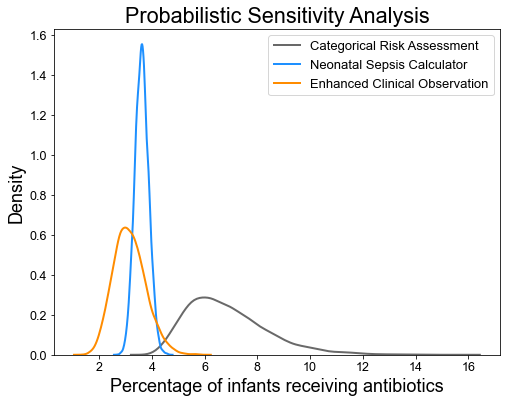

In [12]:
fig, ax = plt.subplots(figsize=(8,6))


sns.distplot(cra_distribution*100, hist=False, kde=True, 
             bins=50, color = 'dimgrey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='Categorical Risk Assessment')


sns.distplot(nsc_distribution*100, hist=False, kde=True, 
             bins=50, color = 'dodgerblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='Neonatal Sepsis Calculator')

sns.distplot(eco_distribution*100, hist=False, kde=True, 
             bins=50, color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             label='Enhanced Clinical Observation')

plt.xlabel('Percentage of infants receiving antibiotics')
plt.ylabel('Density')
plt.title('Probabilistic Sensitivity Analysis')
plt.legend(fontsize='13')

plt.show()

# One way

In [13]:
pchorio = pd.read_csv("Data_SA/ow_pChorio.csv")
pconcerneco = pd.read_csv("Data_SA/ow_pConcernECO.csv")
pconcerngreen = pd.read_csv("Data_SA/ow_pConcernGreen.csv")
pred = pd.read_csv("Data_SA/ow_pRed.csv")
pconcernnochorio = pd.read_csv("Data_SA/ow_pConcernNoChorio.csv")
pconcernyellow = pd.read_csv("Data_SA/ow_pConcernYellow.csv")
pyellow = pd.read_csv("Data_SA/ow_pYellow.csv")

In [14]:
dfs = [pchorio, pconcerneco, pconcerngreen, pred, pconcernnochorio, pconcernyellow, pyellow]

In [15]:
fields = ['CRA.4', 'ECO.4', 'NSC.4', 'NSC.4', 'CRA.4', 'NSC.4', 'NSC.4']

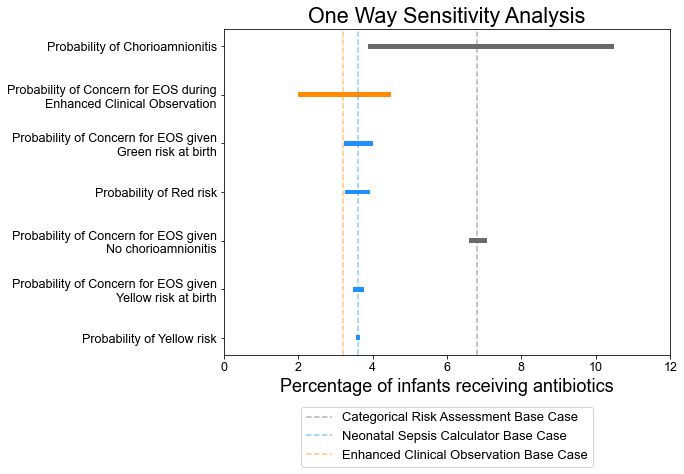

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

people = ('Probability of Chorioamnionitis',
          'Probability of Concern for EOS during\nEnhanced Clinical Observation',
          'Probability of Concern for EOS given\nGreen risk at birth',
          'Probability of Red risk',
          'Probability of Concern for EOS given\nNo chorioamnionitis',
          'Probability of Concern for EOS given\nYellow risk at birth',
          'Probability of Yellow risk',)


y_pos = np.arange(1, len(people) + 1)


lefts = [dfs[i][fields[i]].min()*100 for i in range(len(dfs))]
widths = [dfs[i][fields[i]].max()*100 - lefts[i] for i in range(len(dfs))]
heights = [0.1 for _ in range(len(dfs))]
colors = ['dimgrey', 'darkorange', 'dodgerblue', 'dodgerblue', 'dimgrey', 'dodgerblue', 'dodgerblue']

plt.axvline(6.8, color='dimgrey', linestyle='dashed', alpha=0.5,
            label='Categorical Risk Assessment Base Case')
plt.axvline(3.6, color='dodgerblue', linestyle='dashed', alpha=0.5,
            label='Neonatal Sepsis Calculator Base Case')
plt.axvline(3.2, color='darkorange', linestyle='dashed', alpha=0.5,
            label='Enhanced Clinical Observation Base Case')

ax.barh(y_pos, width=widths, height=heights, left=lefts,
        color=colors, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()

plt.xlim(0, 12)
plt.xlabel('Percentage of infants receiving antibiotics')
plt.title('One Way Sensitivity Analysis')
plt.legend(fontsize='13', loc='center', bbox_to_anchor=(0.5, -0.25))

plt.show()

In [17]:
widths

[6.63339488188033,
 2.4998951744186098,
 0.7646872951393893,
 0.6874366944108701,
 0.48447968480232984,
 0.30174814709948006,
 0.08792981763357988]